# 0. Introduction

## Goal

This notebook aims to present how data stored in non formatted documents could be leveraged to improve data quality inside the PIM.

This notebook uses a handful of modules developped inside this project.

## What pipeline?

The different steps for this project are as follows:

1. fetch all product IDs from PIM with the associated ingredient lists
- split the products between a train set and a test set
- train the algorithm on the train set: i.e. construct the vocabulary
- make it make prediction on the test set
- compare it with the ingredient list on this product

# 1. Fetching the data

We will use production data for training and testing of this model. The ID of the products are the PIM uid, and therefore are listed in the directory of the PIM-API module.

First, let's get those uids.

In [1]:
from src import pimapi
requester = pimapi.Requester('prd')
requester.refresh_directory()
requester._directory

Done


,type,title,lastModified,lastRefreshed,lastFetchedData,lastFetchedFiles
uid,,,,,,
df8bb420-ff59-4af3-9a98-4c3ff91c833c,pomProduct,Chamallow en sachet 100 g HARIBO,2020-01-09 11:29:43.600000+00:00,2020-03-19 16:20:52.762006+00:00,NaT,NaT
2f2af35c-5f1d-4fc2-9af4-deb9e261a29f,pomProduct,Bouillon de légumes sans sel ajouté en sachet ...,2019-09-17 13:05:47.378000+00:00,2020-03-19 16:20:52.762006+00:00,NaT,NaT
32ac61fe-a3c2-4505-9ceb-8c736416757b,pomProduct,Bouillon de légume sans sel ajouté en sachet 5...,2020-02-20 09:50:00.290000+00:00,2020-03-19 16:20:52.762006+00:00,NaT,NaT
a6505df4-3d18-4265-9cdc-173461b9e5ac,pomProduct,Double concentré de tomate 28% en boîte 5/1 VA...,2020-01-10 08:30:56.941000+00:00,2020-03-19 16:20:52.762006+00:00,NaT,NaT
e4ebaa4b-0ddb-45b0-ac1e-c85b369bb840,pomProduct,Double concentré de tomate 28% en boîte 5/1 VA...,2019-04-27 07:58:26.118000+00:00,2020-03-19 16:20:52.762006+00:00,NaT,NaT
...,...,...,...,...,...,...
8deed586-8151-4384-a4e0-775d83ebaedc,pomProduct,QUINOA POP BIO,2020-03-18 08:47:51.580000+00:00,2020-03-19 16:20:52.762006+00:00,NaT,NaT
d9d7674c-8f9b-40ef-86fa-9fa7e357c6fd,pomProduct,BOEUF PDT ET SES HAR. VERTS FOUR. 290GR,2020-03-19 10:32:42.613000+00:00,2020-03-19 16:20:52.762006+00:00,NaT,NaT
741e9eee-3631-47f1-9f3e-69e2bdc52cd6,pomProduct,RIZ AU POULET FACON PAELLA290G FOURREAU,2020-03-19 10:33:13.359000+00:00,2020-03-19 16:20:52.762006+00:00,NaT,NaT


One can see the modification status of the product via the `modification_report` method:

In [2]:
requester.modification_report()

Number of items: 13145
Number of items with outdated data: 13145
Number of items with outdated files: 13145


Outdated products can be refreshed via the following:

In [6]:
# requester.fetch_list_from_PIM(requester.modified_items(), batch_size=20)
# requester.dump_data_from_result()
# requester.dump_files_from_result()
# requester.modification_report()
requester.fetch_list_from_PIM(['776613db-a461-44e1-ab6a-1344ac6ae99c'])
requester.dump_data_from_result()
requester.dump_files_from_result()
requester.modification_report()

Done
Done
Launching 1 threads.
Thread complete!
Done
Number of items: 13145
Number of items with outdated data: 13144
Number of items with outdated files: 13144


The PIM uids of the products are the keys of the `directory` of our requester. We extract the ingredients associated with these uids.

In [11]:
requester.fetch_all_from_PIM(page_size=1000, max_page=-1, nx_properties='*')
requester.result[0].json()['entries'][0]

Done


{'entity-type': 'document',
 'repository': 'default',
 'uid': 'afee12c7-177e-4a68-9539-8cbb68442503',
 'path': '/default-domain/pomSupplierWorkspace/SICO/DESTRUCTEUR_D_ODEUR__500_ML',
 'type': 'pomProduct',
 'state': 'product.waiting.supplier.validation',
 'parentRef': 'a58845c0-cab3-492f-b48d-531f146c3777',
 'isCheckedOut': True,
 'isVersion': False,
 'isProxy': False,
 'changeToken': '17-0',
 'isTrashed': False,
 'title': "DESTR D'ODEURS AIR&TEXTILES 750CCX6 DESODOR U2",
 'lastModified': '2020-03-02T08:36:04.612Z',
 'properties': {'pprodc:otherTypesOfProducts': [],
  'pprodc:withoutPalmOil': None,
  'pprodc:eggFarmingMode': None,
  'pprodc:milkAnimalOrigin': [],
  'pprodc:monoIngredient': False,
  'pprodc:activeIngredients': [],
  'pprodc:withoutCornStarch': None,
  'pprodc:withoutPhthalate': None,
  'pprodc:eggOrigin': [],
  'pprodc:eggProducts': [],
  'pprodc:withoutPolyphosphateAdded': None,
  'pprodc:withoutConservativeAgent': None,
  'pprodc:additives': [],
  'pprodc:withoutBisp

In [36]:
mapping = {'uid': 'uid', 'Libellé': 'title', 'Ingrédients': 'properties.pprodc:ingredientsList'}
df = requester.result_to_dataframe(record_path='entries', mapping=mapping, index='uid')
df

/home/pmasse/PIM-Recognizer/src/pimapi.py:595: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  self.df = pd.io.json.json_normalize(data, record_path=record_path,


,Libellé,Ingrédients
uid,,
afee12c7-177e-4a68-9539-8cbb68442503,DESTR D'ODEURS AIR&TEXTILES 750CCX6 DESODOR U2,None
7d390121-17e8-43bf-a357-9d06b79d2d47,THÉ VERT AGRUME BTE 25S FRAICH LIPTON,None
f234cd84-c8f6-433f-85ec-6e0b6980adc6,T WHEAT 30 A 18X6 52C MISSION 1620,"WHEAT flour (55%), water, vegetable fat (palm)..."
e82a8173-b379-41ac-b319-aa058a04fcfb,VIN ROUGE MÉDITERRANÉE 25CL X12,None
4b12c47c-84f5-4132-b362-22b864379a67,VIN MÉDITERRANÉE ROSÉ 25CL X12,None
...,...,...
5cde49c6-9e7e-4bd2-b22a-3239f643379d,ROULEAU CÉLISOFT 1.20X50 M CITRON,None
0273eadc-851a-4b68-8020-8041700a4f3d,2D VENT FRAIS 5LX4 DESODOR U2,None
ef42a938-2203-446e-8d28-9fd27c6d3146,3D VENT FRAIS 5LX4 DESODOR U2,None


# 2. Train / Test split

We will separate our data into a train test and a test set of equal sizes.

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.5, random_state=42)

In [38]:
print(len(X_train))
X_train.iloc[:10]

6572


,Libellé,Ingrédients
uid,,
5b0ef749-0740-43e9-9a30-241b9f6070f9,Guignolet d'Angers 15° en bouteille 70 cl GIFFARD,None
885d0703-e3e1-4edb-b0e6-70abac8e3139,ECLATS DE BISCUITS AU CITRON ET PAVOT,"Farine de BLÉ, sucre, purée de citron vert (10..."
e6e0ed77-d58a-469d-a129-3f5d3f0ef7e3,Chocolat au lait et Oreo en étui 37 g MILKA,"Ingrédients : Sucre, graisses végétales (palme..."
62028b27-7d1a-4320-a5c5-2296ffc9f15a,Film cuisson pour papillote en rouleau 50 cm x...,None
49fc9ed2-91be-4663-984f-8187835df81c,Salade Sariz en boîte 5/1 BONDUELLE,"Mélange de légumes 46% (carottes, maïs doux en..."
60b5038e-3de2-4f26-b69b-a61257dcb021,BOISSON PÉTILLANTE À BASE DE JUS DE FRUIT CONC...,"jus de pomme à bas de concentré, gaz carboniqu..."
49cbc078-dea1-4a51-a9f4-0e81fab1d36a,Mix cacahuètes salées et épicées en seau 5 kg ...,"Cacahuètes (80%)- d'huile(CACAHUETES, palmRSPO..."
2e758a5f-8e83-4a8d-9a39-e16db02dc71b,TUBO 25 NAPOLITAINS CHOCOLAT AU LAIT 11.28 G ...,Chocolat au lait (cacao : 30 % minimum) Ingréd...
afc8380c-5712-44d7-956d-778309fc5b32,IGP OC TERRE DE SENS BLANC,VIN BLANC


In [39]:
print(len(X_test))
X_test.iloc[:10]

6573


,Libellé,Ingrédients
uid,,
a91342a5-6ffc-4f91-a73f-4919399abcb3,Sauce soja en flacon 150 ml HEINZ,"Eau, sirop de glucose-fructose, sucre, sauce S..."
17bd7d79-198c-49c6-b463-54a819f7f143,Café moulu 100% Robusta Progreso en dose filtr...,cafe 100% robusta
ad4a514c-0b3a-4493-8045-68370256213f,Café en grain Grenat en paquet 1 kg JACQUES VABRE,Grains de café.
c62061d0-1387-4fd2-93be-c238a88e2056,Saladière niçoise en coupelle 220 g SAUPIQUET,"THON LISTAO 22%, pommes de terre 20%, tomates ..."
a471ffdc-84fa-4bf7-bf62-371a438faf55,Piment Basques doux en bocal 400 g EDERKI,"Piments verts, eau, vinaigre de vin, sel, anti..."
8eb9b507-8e77-40f2-9e7a-5f32c2368123,Red Bull en canette 25 cl RED BULL,"eau gazéifiée, saccharose, glucose, correcteur..."
9dd02bc3-c164-4eab-9e88-3096f84fdb2e,Boîte charnière avec couvercle 500 cc en sach...,None
219facda-0348-45b3-99d7-e43e20348bf3,Purée pomme mangue BIO en bib 3 kg COTEAUX NAN...,"Pommes* (73%), mangue* (27%)"
a01039be-eb79-454f-a384-c142d1d80d0c,"Tajine végétarienne en barquette 2,3 kg CHRIST","Légumes 48,1% : pommes de terre 18,2%, carotte..."


# 3. Constructing the vocabulary

We will now use bag-of-words related functionalities of scikit-learn to construct our vocabulary.

## 3.1 Removing `None` values

First step is to remove `None` values from ingredient lists to make our count of words.

In [43]:
import pandas as pd
print(f'None values before replacement in X_train: {sum(pd.isna(X_train["Ingrédients"]))}')
X_train.loc[:, 'Ingrédients'] = X_train.loc[:, 'Ingrédients'].fillna('')
print(f'None values after replacement in X_train: {sum(pd.isna(X_train["Ingrédients"]))}')
print(f'None values before replacement in X_test: {sum(pd.isna(X_test["Ingrédients"]))}')
X_test.loc[:, 'Ingrédients'] = X_test.loc[:, 'Ingrédients'].fillna('')
print(f'None values after replacement in X_train: {sum(pd.isna(X_test["Ingrédients"]))}')

None values before replacement in X_train: 0
None values after replacement in X_train: 0
None values before replacement in X_test: 0
None values after replacement in X_train: 0


## 3.2 Parsing the corpus

We now parse our ingredient lists, with a naive approach (no stop words, no preprocessing, ...).

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train.loc[:, 'Ingrédients'])

We can see that we know have a matrix with as much rows as the number of products in our train corpus, and as much columns as the number of different words in their ingredient lists.

In [18]:
X_train_counts.shape

(6572, 3155)

The vocabulary has been computed: 

In [19]:
print(f'The vocabulary length is {len(count_vect.vocabulary_)}')
count_vect.vocabulary_

The vocabulary length is 3155


{'farine': 1422,
 'de': 1032,
 'blé': 575,
 'sucre': 2776,
 'purée': 2487,
 'citron': 817,
 'vert': 3001,
 '10': 28,
 'huile': 1704,
 'tournesol': 2909,
 'graines': 1632,
 'pavot': 2282,
 'beurre': 531,
 'cacao': 647,
 'arôme': 442,
 'naturel': 2121,
 'sel': 2688,
 'curcuma': 1005,
 'antioxydant': 390,
 'extrait': 1414,
 'romarin': 2571,
 'ingrédients': 1755,
 'graisses': 1635,
 'végétales': 3040,
 'palme': 2238,
 'palmiste': 2241,
 'lait': 1836,
 'écrémé': 3092,
 'en': 1336,
 'poudre': 2406,
 'lactosérum': 1834,
 'pâte': 2491,
 'concentré': 879,
 'maigre': 1933,
 'amidon': 356,
 'émulsifiants': 3116,
 'lécithine': 1914,
 'soja': 2721,
 'poudres': 2407,
 'lever': 1874,
 'carbonate': 692,
 'acide': 254,
 'potassium': 2403,
 'ammonium': 362,
 'sodium': 2717,
 'arômes': 443,
 'noisettes': 2150,
 'contient': 910,
 'sirop': 2711,
 'glucose': 1591,
 'et': 1391,
 'ou': 2220,
 'fructose': 1523,
 'dans': 1028,
 'le': 1861,
 'fourrage': 1490,
 'crème': 984,
 'confiseur': 891,
 'au': 467,
 'mélan

We can print out the top 10 most frequent words in our ingredient lists:

In [20]:
word_counts = X_train_counts.sum(axis=0)
word_counts2 = [(word, word_counts[0, idx]) for word, idx in count_vect.vocabulary_.items()]
word_counts2.sort(key=lambda x: x[1], reverse=True)
word_counts = word_counts2
word_counts[:10]

[('de', 14571),
 ('sucre', 2859),
 ('sel', 2297),
 ('acide', 1982),
 ('eau', 1776),
 ('lait', 1464),
 ('huile', 1431),
 ('poudre', 1366),
 ('arôme', 1301),
 ('et', 1230)]

# 4. First analysis of a single document

## 4.1 Parsing a doc from the test set

First, we use a function that parses a document from the disk from its product uid and returns a list of strings. For illustration, we choose one of the products in our test set.

In [21]:
X_test.iloc[:10]

,Libellé,Ingrédients
uid,,
a91342a5-6ffc-4f91-a73f-4919399abcb3,Sauce soja en flacon 150 ml HEINZ,"Eau, sirop de glucose-fructose, sucre, sauce S..."
17bd7d79-198c-49c6-b463-54a819f7f143,Café moulu 100% Robusta Progreso en dose filtr...,cafe 100% robusta
ad4a514c-0b3a-4493-8045-68370256213f,Café en grain Grenat en paquet 1 kg JACQUES VABRE,Grains de café.
c62061d0-1387-4fd2-93be-c238a88e2056,Saladière niçoise en coupelle 220 g SAUPIQUET,"THON LISTAO 22%, pommes de terre 20%, tomates ..."
a471ffdc-84fa-4bf7-bf62-371a438faf55,Piment Basques doux en bocal 400 g EDERKI,"Piments verts, eau, vinaigre de vin, sel, anti..."
8eb9b507-8e77-40f2-9e7a-5f32c2368123,Red Bull en canette 25 cl RED BULL,"eau gazéifiée, saccharose, glucose, correcteur..."
9dd02bc3-c164-4eab-9e88-3096f84fdb2e,Boîte charnière avec couvercle 500 cc en sach...,
219facda-0348-45b3-99d7-e43e20348bf3,Purée pomme mangue BIO en bib 3 kg COTEAUX NAN...,"Pommes* (73%), mangue* (27%)"
a01039be-eb79-454f-a384-c142d1d80d0c,"Tajine végétarienne en barquette 2,3 kg CHRIST","Légumes 48,1% : pommes de terre 18,2%, carotte..."


In [22]:
from src.pimpdf import PDFDecoder
import os

# This uid has been gotten from the previous cell, maybe from a previous run!
uid = '776613db-a461-44e1-ab6a-1344ac6ae99c'
test_doc_blocks = PDFDecoder.path_to_blocks(os.path.join('.', 'dumps', 'prd', uid, 'FTF.pdf'))
print(f'Number of blocks in this document: {len(test_doc_blocks)}')
print('\n', '\n-----------------------------------------------------------------\n'.join(test_doc_blocks))

Number of blocks in this document: 42

 FICHE DE SPECIFICATIONS
-----------------------------------------------------------------
DELIR' PIK (avec violet)
-----------------------------------------------------------------
ANNEXE 02207B
date:10/06/2015
-----------------------------------------------------------------
HACCP
-----------------------------------------------------------------
Définition et procédé d'obtention :
-----------------------------------------------------------------
Assortiment d'articles de confiserie, gélifiés, souples, colorés, pour certains composés de deux couches (une 
translucide colorée et une opaque blanche), enrobés de sucre acidifié, obtenus par la technique de coulée d'un sirop 
résultant de la dissolution de sucres et gélatine (foisonné pour la couche opaque) dans des empreintes d'amidon natif 
de maïs leur conférant des formes originales qui après gélification et séchage, sont démoulés, dépoudrés et enrobés 
de sucre acidifié.
-------------------------

For this specific document (*776613db-a461-44e1-ab6a-1344ac6ae99c*), the correct block of text is:

    Ingrédients:  sirop de glucose; sucre; gélatine; dextrose; acidifiants: acide citrique, acide malique; agent d'enrobage: cire de carnauba; correcteurs d'acidité: citrate tricalcique, malate acide de sodium; arôme; concentrés de fruits et de plantes: citron, carthame, spiruline, patate douce, radis; sirop de sucre inverti; colorants: carmins, bleu patenté V, carotènes végétaux, lutéine, anthocyanes.

The index of this correct block is *9* in our block list.

In [23]:
true_idx = 9

We will now parse these blocks with the vocabulary computed from our train set. We reuse the `CountVectorizer` we trained before, but take care just to use the `transform` method.

Using the `fit_transform` method would retrain the model with the current blocks of text.

In [24]:
test_doc_counts = count_vect.transform(test_doc_blocks)
test_doc_counts

<42x3155 sparse matrix of type '<class 'numpy.int64'>'
	with 150 stored elements in Compressed Sparse Row format>

## 4.2 Getting some insights from this first analysis

We can compute and draw the terms counts for our blocks: 

In [25]:
import numpy as np

term_counts = np.ravel(test_doc_counts.sum(axis=1))
term_counts

array([ 1,  2,  2,  0,  1, 40,  0,  0,  1, 50,  0,  0, 10,  1,  2,  3,  0,
        2,  2,  0,  0,  5,  2,  2,  1,  2,  0,  0,  2,  0,  1,  5, 11,  4,
        0,  3,  5,  1, 16,  1, 11,  0])

We can see that the *true* ingredient list has the higher term_count. However, term counts alone are likely to have a biais toward long blocks, so we can also compute a term frequency.

We will instantiate a new count_vectorizer, for the sole purpose of counting tokens in the blocks.

In [26]:
blocks_word_counts = np.ravel(CountVectorizer().fit_transform(test_doc_blocks).todense().sum(axis=1))
blocks_word_counts

array([ 3,  4,  6,  1,  4, 70,  1,  3,  1, 50,  3,  1, 14,  5,  2,  4,  1,
        2,  2,  2,  4,  5,  2,  2,  2,  3,  4,  6,  8,  0,  1, 10, 22, 10,
        1,  8, 17,  2, 20,  3, 20,  0])

We can now compute the frequencies of "ingredient words" in the blocks of this document.

In [27]:
term_freqs = np.divide(term_counts, blocks_word_counts, out=np.zeros(term_counts.shape), where=blocks_word_counts!=0)
term_freqs

array([0.33333333, 0.5       , 0.33333333, 0.        , 0.25      ,
       0.57142857, 0.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 0.71428571, 0.2       , 1.        ,
       0.75      , 0.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 1.        , 0.5       ,
       0.66666667, 0.        , 0.        , 0.25      , 0.        ,
       1.        , 0.5       , 0.5       , 0.4       , 0.        ,
       0.375     , 0.29411765, 0.5       , 0.8       , 0.33333333,
       0.55      , 0.        ])

/var/lib/anaconda3/envs/pimreco/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/var/lib/anaconda3/envs/pimreco/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0, flags=flags)


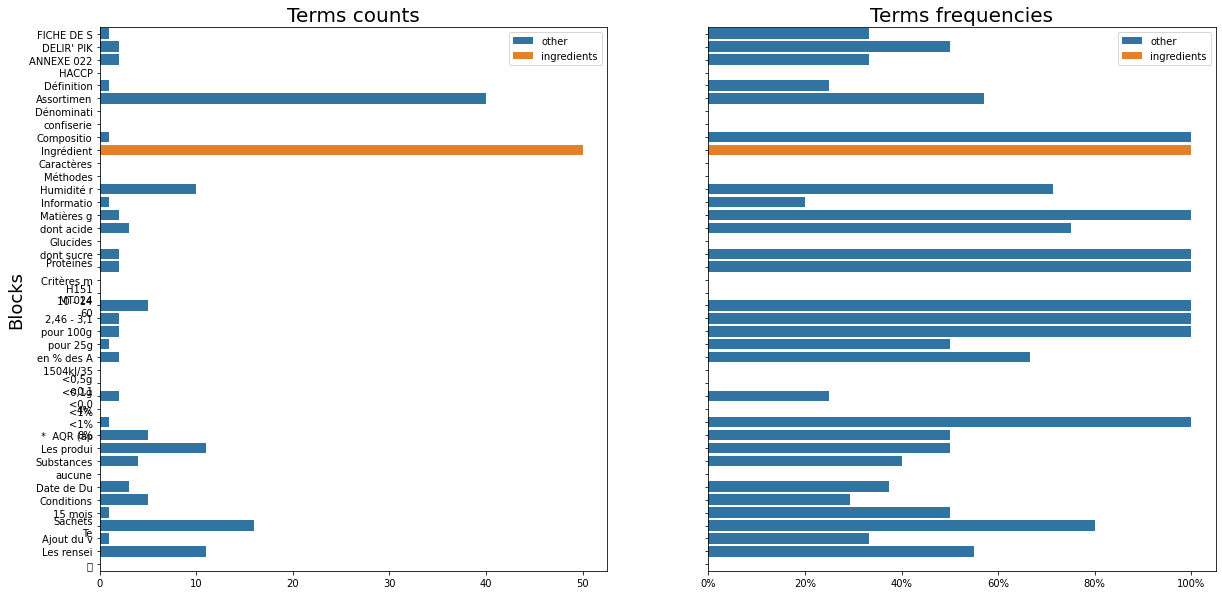

In [30]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

colors = ['other'] * len(test_doc_blocks)
colors[true_idx] = 'ingredients'

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharey=True)
sns.barplot(ax=ax[0], x=term_counts, y=[block[:10] for block in test_doc_blocks], hue=colors, dodge=False)
sns.barplot(ax=ax[1], x=term_freqs, y=[block[:10] for block in test_doc_blocks], hue=colors, dodge=False)
ax[0].set_title('Terms counts', fontsize=20)
ax[0].set_ylabel('Blocks', fontsize=18)
ax[1].set_title('Terms frequencies', fontsize=20)
ax[1].xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
pass

We can see that some very short texts also have an "ingredient word frequency" equal to 100%.

We can draw a scatter plot of these indicators:

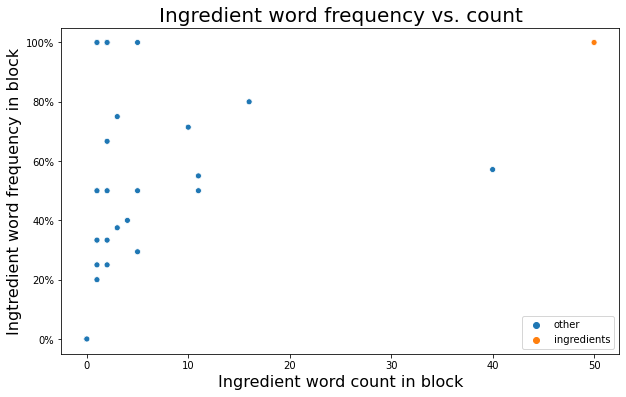

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
sns.scatterplot(ax=ax, x=term_counts, y=term_freqs, hue=colors)
ax.set_title('Ingredient word frequency vs. count', fontsize=20)
ax.set_xlabel('Ingredient word count in block', fontsize=16)
ax.set_ylabel('Ingtredient word frequency in block', fontsize=16)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
pass

As expected, the correct ingredient list is in the top right quadrant of this representation. Should all cases yield results as sharply contrasted, we will have no difficulty in constructing an accurate functionality!

## 4.3 A difficulty arises in assessing ground truth for model validation

### Long strings are seldom strictly equal

We can compare the document ingredient list, with the one stored in the PIM system:

In [32]:
test_doc_blocks[true_idx].replace('\n', '') == df.loc[uid, "Ingrédients"]

False

Because a great deal of the current data in the PIM system has (at least once!) been manually keyed in, it is very likely that there will be an arguably high ratio of mistakes.

In [33]:
print('From pdf file: ')
print(test_doc_blocks[true_idx].replace('\n', ''))
print('--------------------------------------------------------------------------------------')
print('From PIM system:')
print(df.loc[uid, "Ingrédients"])

From pdf file: 
Ingrédients:  sirop de glucose; sucre; gélatine; dextrose; acidifiants: acide citrique, acide malique; agent d'enrobage: cire de carnauba; correcteurs d'acidité: citrate tricalcique, malate acide de sodium; arôme; concentrés de fruits et de plantes: citron, carthame, spiruline, patate douce, radis; sirop de sucre inverti; colorants: carmins, bleu patenté V, carotènes végétaux, lutéine, anthocyanes.
--------------------------------------------------------------------------------------
From PIM system:
Ingrédients: sirop de glucose, sucre, gélatine, dextrose, acidifiants: acide citrique, acide malique, agent d'enrobage: cire de carnauba, correcteurs d'acidité: citrate tricalcique, malate acide de sodium, arôme, concentrés de fruits et de plantes: citron, carthame, spiruline, patate douce, radis, sirop de sucre inverti, colorants: carmins, bleu patenté V, carotènes végétaux, lutéine, anthocyanes.


One can see that although very close, those 2 texts are somewhat different, from the punctuation marks.

### Different strategies can be undertaken to get around this difficulty

It is mandatory to compare the results of the model with the ground truth to assess the performance of the model. Some workarounds can be set up:

- Ignoring all products that do not have a strict matching block in their pdf file:
    - This will enable for a simple validation process
    - But it might dramatically decreasing the size of our dataset
    - as well as making 'short ingredient list' product overrepresented
    
    
- Defining a softer way to match texts between pdf files and PIM system data **with some text preprocessing** and filtering products that do not have a matching block
    - This will mitigate the previous drawbacks
    - But will increase complexity
    
    
- Defining a softer way to match texts between pdf files and PIM system data **by computing an edition distance** and filtering products that do not have a matching block
    - This will mitigate the previous drawbacks
    - But will increase complexity, as well as requiring to manually set up a distance threshold.
    - This could also lead to have separate pdf file blocks considered ground truth should the threshold distance be too high
    
- Considering blocks n-grams 
    - This might increase the number of 

- Manually labeling some pdf files
    - The most efficient
    - But the most time-consuming too!


# 5. Comparison between PIM system *ground truth* with documents content

We can try to find the products for which the PIM system ingredient list is strictly equal to one of the pdf file blocks.

## 5.1 Retrieving all the blocks from our corpus

The function below enables to retrieve all the blocks as a pandas Series.

In [ ]:
%%time
uid_list = list(requester._directory.index)
path_list = [os.path.join('.', 'dumps', 'prd', uid, 'FTF.pdf') for uid in uid_list]
path_series = pd.Series(path_list, index=uid_list)
blocks_series = PDFDecoder.threaded_paths_to_blocks(path_series)

In [ ]:
blocks_series.rename('pdf_blocks', inplace=True)
blocks_series.index.rename('uid', inplace=True)
blocks_series

As it takes some time to run the pdf parsing on all the corpus, we save it in a csv.

In [ ]:
import datetime
timestamp = datetime.datetime.now().strftime('%Y%m%d%H%M%S')
blocks_series.to_csv(os.path.join('.', 'dumps', 'prd', 'blocks_'+ timestamp + '.csv'), header=True)

## 5.2 Comparing blocks with PIM ingredient lists

We only keep products with ingredient list.

In [ ]:
df_ingred = df.loc[pd.notna(df['Ingrédients'])]
df_ingred

Among these products with an ingredient list, we only keep the ones which have (at least) a block from the pdf that is strictly matching its PIM ingredient list:

In [ ]:
joined_df = df_ingred.join(blocks_series)
matching = joined_df.loc[joined_df['Ingrédients'] == joined_df['pdf_blocks']].drop_duplicates()
matching

We can see that only keeping products with strict equality between PIM ingredient list and any of the pdf blocks has dramatically reduced their number: from 9549 to 299. New sample size only represents less than 3.5% of the initial set.

## 5.3 Making the same comparison but softening the criterion

TODO !!!

# 6. Manually labeling data

The most straightforward solution to have labeled data (but also the most time consuming...) is to label them manually!

## 6.1 Randomly selecting products to label

First step is to **randomly** select products from PIM, extract their attached documents and store them away safely. The criterion for these 500 products will be:

- they are food products: beverages or grocery
- they have a supplier technical datasheet attached

They will be stratified by product type (beverage or grocery).

In [ ]:
requester.result[0].json()['entries'][0]

In [ ]:
mapping = {'uid': 'uid',
           'designation': 'title',
           'state': 'state',
           'ingredients': 'properties.pprodc:ingredientsList',
           'type': 'properties.pprodtop:typeOfProduct'}
df = requester.file_report_from_result(mapping=mapping, index='uid') # , record_path='entries') 
df

In [ ]:
filtered_df = df.loc[(df.type.isin(['grocery', 'nonAlcoholicDrink']))
                     & (df.has_supplierdatasheet)]

In [ ]:
train, ground_truth_df = train_test_split(filtered_df, test_size=500, random_state=42, stratify=filtered_df.type)
ground_truth_df

Now that we have our products, we save their attached documents on disk.

In [ ]:
requester.fetch_list_from_PIM(ground_truth_df.index, batch_size=20)

In [ ]:
requester.dump_data_from_result(update_directory=False, root_path=os.path.join('.', 'ground_truth'))
requester.dump_files_from_result(update_directory=False, root_path=os.path.join('.', 'ground_truth'))

In [ ]:
ground_truth_df['designation'].to_csv(os.path.join('.', 'ground_truth', 'uid.csv'), header=True, encoding='utf-8-sig')

We then try to reimport the ground truth after having processed some files, just to check that everything went ok.

In [ ]:
import pandas as pd
import os

In [ ]:
pd.read_csv(os.path.join('.', 'ground_truth', 'manually_labelled_ground_truth.csv'),
            sep=';',
            encoding='latin-1',
            index_col='uid')

In [ ]:
uid = '70500268-802d-4211-93ba-9edbf6e0e7a3'
print(pd.read_csv(os.path.join('.', 'ground_truth', 'manually_labelled_ground_truth.csv'), sep=';', encoding='latin-1').set_index('uid', drop=True).loc[uid, 'ingredients'])

## 6.2 Reconstructing Train/Test split after labelling

We will now reimport the ground truth csv file and recreate the train/test split.

In [ ]:
test_set =pd.read_csv(os.path.join('.', 'ground_truth', 'manually_labelled_ground_truth.csv'),
                      sep=';',
                      encoding='latin-1',
                      index_col='uid')
test_set

In [ ]:
mapping = {'uid': 'uid',
           'Libellé': 'title',
           'Ingrédients': 'properties.pprodc:ingredientsList'}
df = requester.result_to_dataframe(record_path='entries', mapping=mapping, index='uid')
df

In [ ]:
X_train = df[(~df.index.isin(test_set.index)) & (pd.notna(df['Ingrédients']))]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train.loc[:, 'Ingrédients'])
count_vect.vocabulary_

## Different strategies

TODO !!!

But The similarity between the ground truth (the pdf file) and the content of the PIM system can be measured via the [Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance). This distance is the number of character insertions, deletions or substitutions to get from one text to the other.

If we compute this distance between the pdf file block and the PIM system content we get:

In [ ]:
import jellyfish
dist = jellyfish.levenshtein_distance(test_doc_blocks[true_idx].replace('\n', ''),
                                      df.loc[uid, "Ingrédients"])
print(f'Levenshtein distance between pdf file and PIM system content is: {dist}')

We can compute this distance for each block in our pdf file, and plot it in a bar graph:

In [ ]:
distances = list(map(lambda x:jellyfish.levenshtein_distance(x.replace('\n', ''), df.loc[uid, "Ingrédients"]),
                 test_doc_blocks))
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(ax=ax, x=distances, y=[block[:10] for block in test_doc_blocks], hue=colors, dodge=False)
ax.set_title('Levenshtein distance by block', fontsize=20)
ax.set_ylabel('Blocks', fontsize=18)
pass

## 4.2 Making prediction on a document